# Parameters related to flights delays and cancellations

## Investigation Overview

In this investigation, I wanted to have an idea on some elements related to any flight delay or cancellation. So, for each of them, the main focus will be on the carriers, the destinations, the departure delays and the planned flight duration. 

## Dataset Overview

The data consisted of 73546 records of flights, for the US, over 5 years, from 1987 to 1992. There are time variables (mainly expected times and delays), numeric variables and text variables such are origins, destinations and carriers' names. We also have boolean like information to know if the flight is canceled or diverted.  
Those data files have been selected from [here](http://stat-computing.org/dataexpo/2009/the-data.html).   
A detailed presentation of the data is available [here](https://www.transtats.bts.gov/Fields.asp?Table_ID=236).   
As the original files were too big, I created a random sample of the original files I chose to use.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime, time

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load data files
df_1987 = pd.read_csv('data/1988_sample.csv')
df_1989 = pd.read_csv('data/1989_sample.csv')
df_1990 = pd.read_csv('data/1990_sample.csv')
df_1991 = pd.read_csv('data/1991_sample.csv')
df_1992 = pd.read_csv('data/1992_sample.csv')

In [4]:
# concat all into one dafaframe
df = pd.concat([df_1987, df_1989, df_1990, df_1991, df_1992], ignore_index=True)

In [5]:
# Make a copy of the original dataframe
df_flights = df.copy()

In [6]:
# Drop the columns where all elements are missing
df_flights.drop('TailNum', axis=1, inplace=True)
df_flights.drop('AirTime', axis=1, inplace=True)
df_flights.drop('TaxiIn', axis=1, inplace=True)
df_flights.drop('TaxiOut', axis=1, inplace=True)
df_flights.drop('CancellationCode', axis=1, inplace=True)
df_flights.drop('CarrierDelay', axis=1, inplace=True)
df_flights.drop('WeatherDelay', axis=1, inplace=True)
df_flights.drop('NASDelay', axis=1, inplace=True)
df_flights.drop('SecurityDelay', axis=1, inplace=True)
df_flights.drop('LateAircraftDelay', axis=1, inplace=True)

In [7]:
# Set the "Cancelled" column type to boolean
df_flights['Cancelled'] = df_flights['Cancelled'].astype('bool')

In [8]:
# Set the "Year", "Month" and "DayOfMonth" to datetime
# Rename the needed columns for the datetime conversion
df_flights = df_flights.rename(columns={'Year': 'year', 'Month': 'month', 'DayofMonth': 'day'})

# Create a new column as the datetime
df_flights['timestamp'] = pd.to_datetime(df_flights[['year', 'month', 'day']])

In [9]:
# Drop the previous year, month, day columns we don't need anymore
df_flights.drop('year', axis=1, inplace=True)
df_flights.drop('month', axis=1, inplace=True)
df_flights.drop('day', axis=1, inplace=True)

## Occurences of the cancellations

We have a very low 1.1% of cancelled flights, which indeed is still important in the flight industry.   
Visually, the destination city with the most cancelled flights is ORD for "Chicago-O´Hare". US Airways is the carrier with the most cancelled flights.  

In [10]:
# Get the number of cancelled
cancelled = df_flights.query('Cancelled == True')['Cancelled'].count()
non_cancelled = df_flights.shape[0] - cancelled

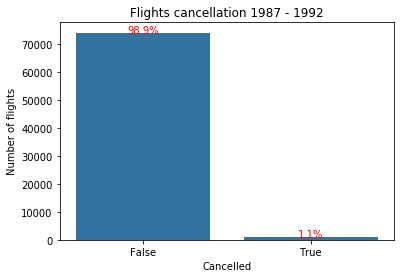

In [11]:
# Create a bar chart of the cancelation state
# Use only one color
base_color = sb.color_palette()[0]

# plot the bar chart
cancelled_bar = sb.countplot(data = df_flights, x = 'Cancelled', color = base_color)

# Set labels names
cancelled_bar.set(title='Flights cancellation 1987 - 1992', xlabel='Cancelled', ylabel='Number of flights')

# label the frequencies on the bars
# First, calculate non cancelled percentage
non_cancelled_percent = '{:0.1f}%'.format(100*non_cancelled/df_flights.shape[0])

# calculate the cancelled percentage
cancelled_percent = '{:0.1f}%'.format(100*cancelled/df_flights.shape[0])

# Set the labels names on the bars
plt.text(0, non_cancelled-8, non_cancelled_percent, ha = 'center', color = 'r')
plt.text(1, cancelled-8, cancelled_percent, ha = 'center', color = 'r');

### Per cities

In [12]:
# Get the cancelled flight dataframe
df_cancelled = df_flights[df_flights['Cancelled'] == True]

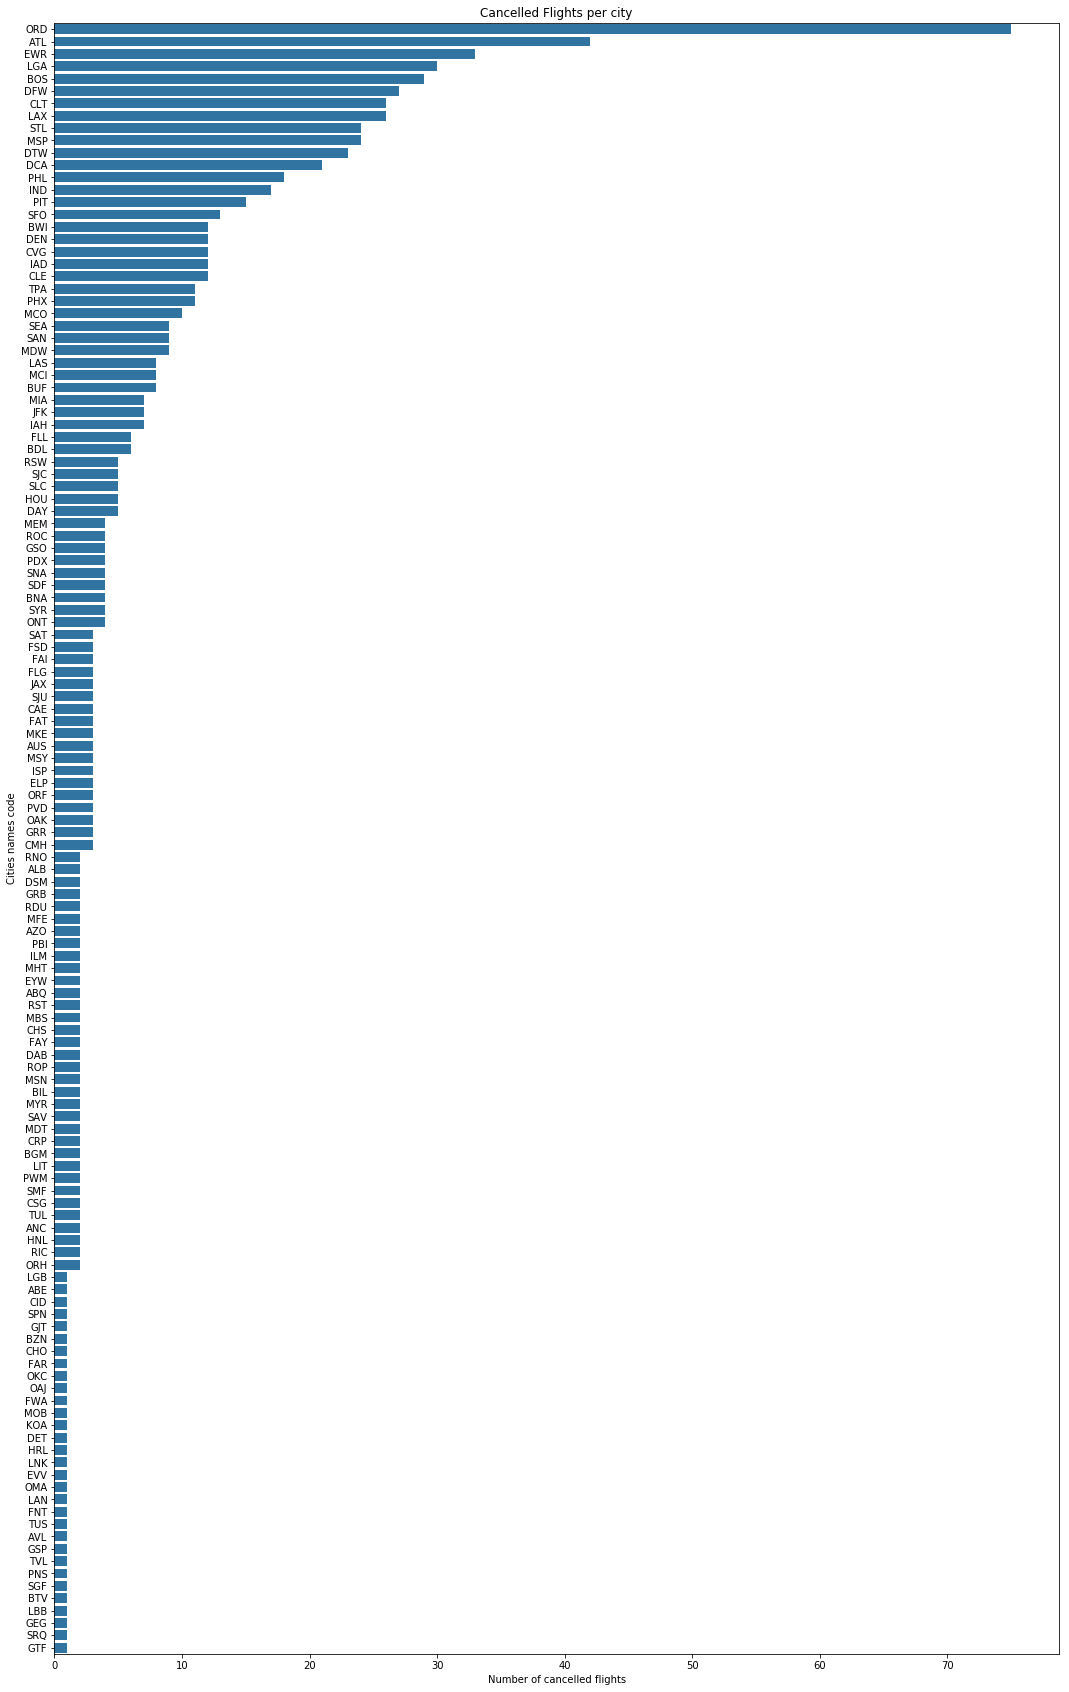

In [13]:
# Set the size bigger
plt.figure(figsize = [18, 30])

# Use only one single color
base_color = color = sb.color_palette()[0]

# sort
cat_order = df_cancelled['Dest'].value_counts().index

# plot the bar chart
cancelled_cities_plot = sb.countplot(data = df_cancelled, y = 'Dest', color = base_color, order = cat_order)

cancelled_cities_plot.set(title='Cancelled Flights per city', xlabel='Number of cancelled flights', ylabel='Cities names code');

### Per carriers

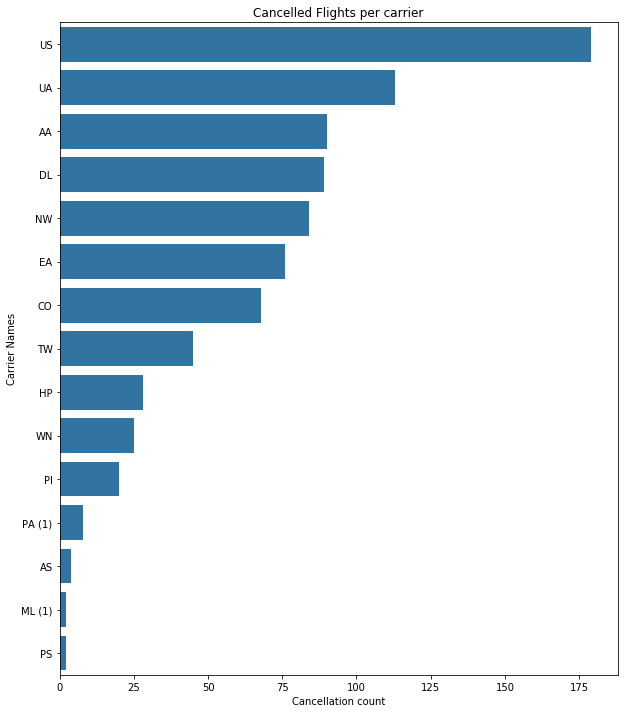

In [14]:
# Set the size bigger
plt.figure(figsize = [10, 12])

# Use only one single color
base_color = color = sb.color_palette()[0]

# sort
cat_order = df_cancelled['UniqueCarrier'].value_counts().index

# plot the bar chart
cancelled_carrier_plot = sb.countplot(data = df_cancelled, y = 'UniqueCarrier', color = base_color, order = cat_order)

# set titles
cancelled_carrier_plot.set(title='Cancelled Flights per carrier', xlabel='Cancellation count', ylabel='Carrier Names');

## Distribution of arrival delays

The distribution was right skewed. An appropriate bin width and a zoom on the main bulk of the data through the use of axis limits led to focus on the main delays which are all aronud zero. Visually from -40 minutes to 0 excluded, meaning arrival in advance, and from 0 excluded to 80 minutes, meaning arrival late.

In [15]:
# Get a copy of the dataframe we started to clean
df_completed_flights = df_flights.copy()

In [16]:
# Now we delete the rows where at least one element is missing
df_completed_flights.dropna(inplace=True)

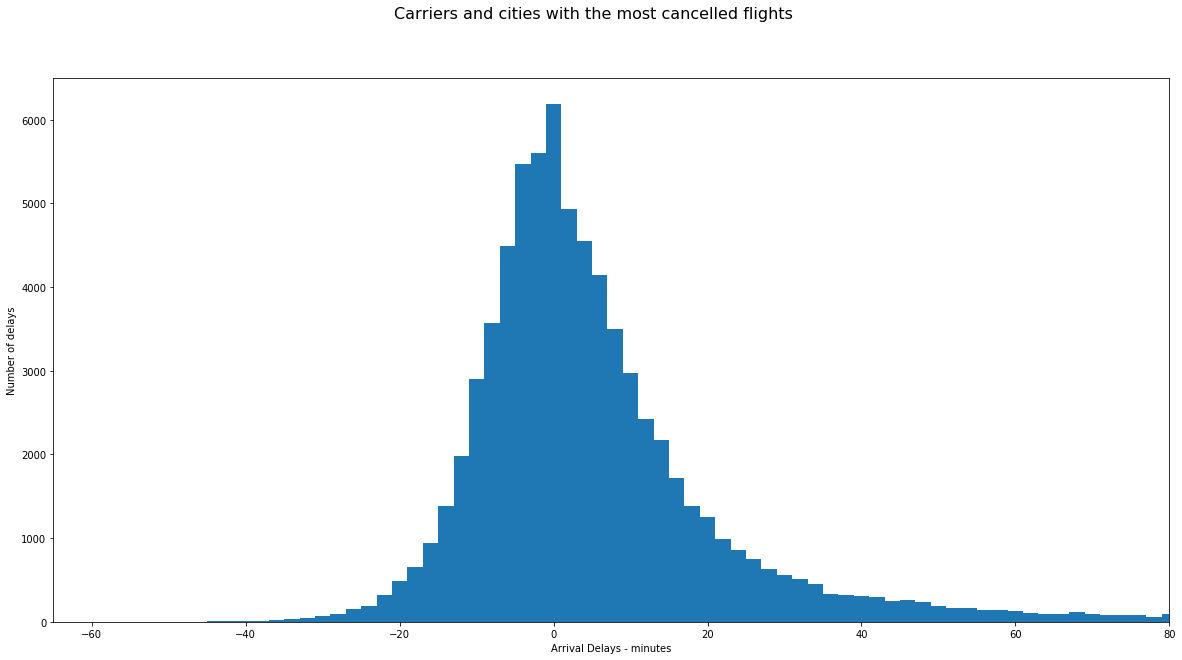

In [20]:
# tentative for a better zoom selection
# set the figures sizes
fig = plt.figure(figsize = [20, 10])

# Set the title
fig.suptitle('Carriers and cities with the most cancelled flights', fontsize=16)

# Set an appropriate bin width
bin_edges = np.arange(df_completed_flights['ArrDelay'].min(), df_completed_flights['ArrDelay'].max()+2, 2)

# plot the data
plt.hist(data = df_completed_flights, x = 'ArrDelay', bins = bin_edges)

# set the  x values limitation for the 2nd histogram. I start at the min() and use 70 as the right limit
plt.xlim((df_completed_flights['ArrDelay'].min(), 80))

# set x and y axis labels
plt.ylabel('Number of delays');
plt.xlabel('Arrival Delays - minutes'); 

## Cancelled flights : destinations vs carriers codes

Considering that these are not numeric variables, there is no variation between the features but just an accumulation of points each time we have an association.   
Here are the observed relationships between the carriers and the cities with the most cancelled flights :  
- For ORD (Chicago) arrival airport, AA (American Airlines) and UA (United Airlines) are the carriers with the most cancelled flights.
- For BOS (Boston) arrival airport, US (US Airways) is the winner.
- For LGA (New York) arrival airport, US (US Airways) is also the one with the most cancelled flights.
- for ATL (Atlanta) arrival airport, EA (Easten Airlines) and DL (Delta Airlines) are the carriers with the most cancelled flights. 

In [21]:
# Create a dataframe for the top 5 cancelled destinations

# set the list of the choosen airports
top_dest = ['ORD', 'ATL', 'AWR', 'LGA', 'BOS']

# Create the dataframe
df_5_cancelled = df_cancelled.query('Dest in @top_dest')

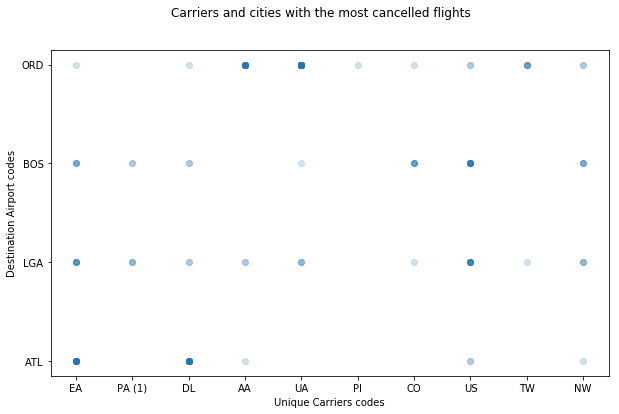

In [22]:
# Set the plot size
fig = plt.figure(figsize = [10, 6])

# use the jitter from reglot
plt.scatter(data = df_5_cancelled, x = 'UniqueCarrier', y='Dest', alpha = 1/5)

# Set the title
fig.suptitle('Carriers and cities with the most cancelled flights', fontsize=12)

# set x and y labels
plt.xlabel('Unique Carriers codes')
plt.ylabel('Destination Airport codes');

## Delayed flights : destinations vs carriers codes

We have a lot of cities. Those cities names, along the y axis, have not been displayed on purpose, for visualization clarity. Visually, only the lines - along with the x axis - with the most points are relevants.  
For all the arrival cities with delays, here are the top three carriers which are the mostly late : AA (American Airlines), US (US Airways), DL (Delta Airlines).

In [23]:
# focus on the cities where ArrDelay > 0
df_delayed = df_completed_flights.query('ArrDelay > 0')

In [24]:
# Create a dataframe for the 5 cities where have the most delayed flights
delayed_topcities = ['ORD', 'ATL', 'DFW', 'LAX', 'DEN']
df_delayed_topcities = df_delayed.query('Dest in @delayed_topcities')

[]

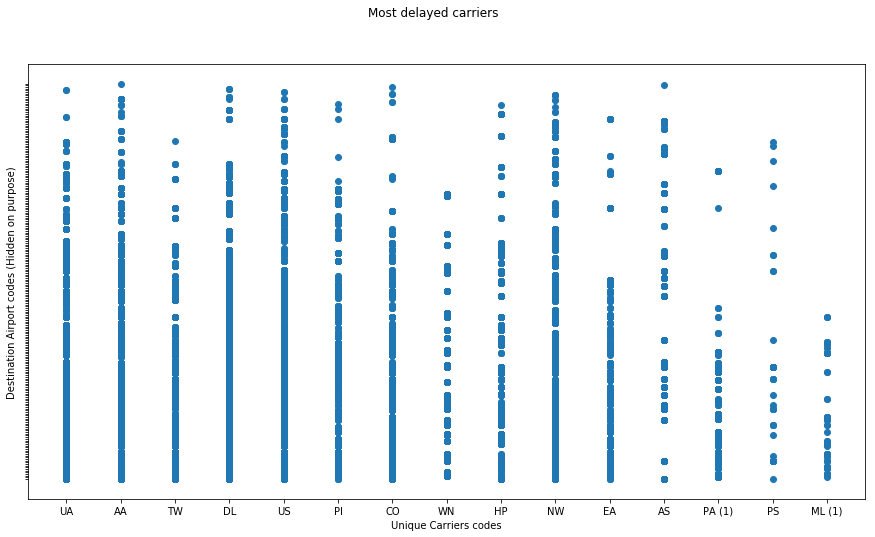

In [26]:
# Relationship between top 5 arrival cities for delays and carriers

# set the graph size
fig = plt.figure(figsize = [15, 8])

# scatterplot
plt.scatter(data = df_delayed, x = 'UniqueCarrier', y = 'Dest')

# set x and y labels
plt.xlabel('Unique Carriers codes')
plt.ylabel('Destination Airport codes (Hidden on purpose)')

# Set the plot title
fig.suptitle('Most delayed carriers', fontsize=12)

# to not display the cities names on the y axis
# found it here : https://stackoverflow.com/questions/12444716/how-do-i-set-the-figure-title-and-axes-labels-font-size-in-matplotlib
cur_axes = fig.gca()
# cur_axes.axes.get_xaxis().set_ticklabels([])
cur_axes.axes.get_yaxis().set_ticklabels([])

## Cancelled flights : destinations vs carriers codes and planned flights durations
  
- EA and DL cancelled flights were mostly planned for to ATL (Atlanta). The majority of them were short and medium-haul flights.
- AA and AU cancelled flights were mostly planned for ORD (Chicago). Here we had short and medium-haul flights too.  
- CO, US and NW cancelled flights were mostly planned for BOS (Boston). Here we had short-haul flights.  

For airlines, distances (and consequently flights durations) are organized along short-haul, medium-haul and long-haul flights. We choose here :

    short-haul flights : flights duration <= 120 min
    medium-haul flights : 5h >= flights duration > 120 min
    long-haul flights : flights duration > 5h

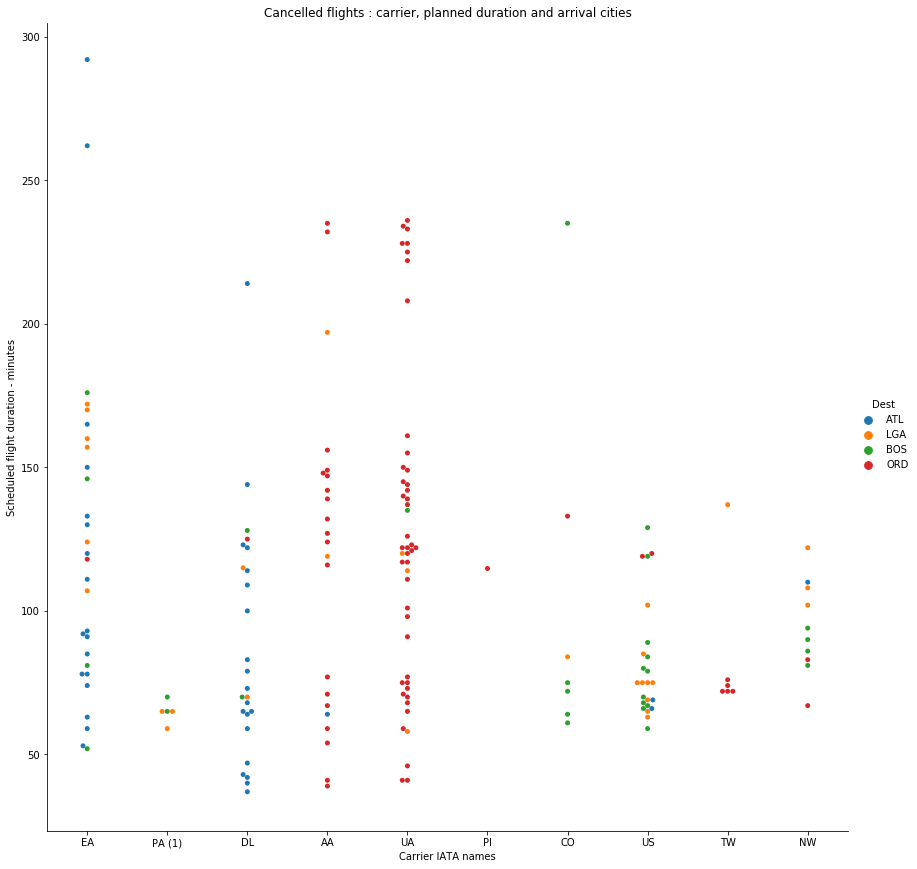

In [27]:
# plot the 3 variables : carrier (UniqueCarrier, scheduled flight duration(CRSElapsedTime) and destination (Dest)
myplot = sb.catplot(x="UniqueCarrier", y="CRSElapsedTime", kind="swarm", data=df_5_cancelled, hue='Dest', height=12)

# Set the titles
myplot.set(title='Cancelled flights : carrier, planned duration and arrival cities', xlabel='Carrier IATA names', ylabel='Scheduled flight duration - minutes');

## Delayed flights : destinations vs carriers codes and departure delays

For the destination ORD (Chicago), we have departure delays for all the carriers. 
For the destination DEN (Denver), we have departure delays, mainly for AA (American Airlines) and DL (Delta Airlines).  

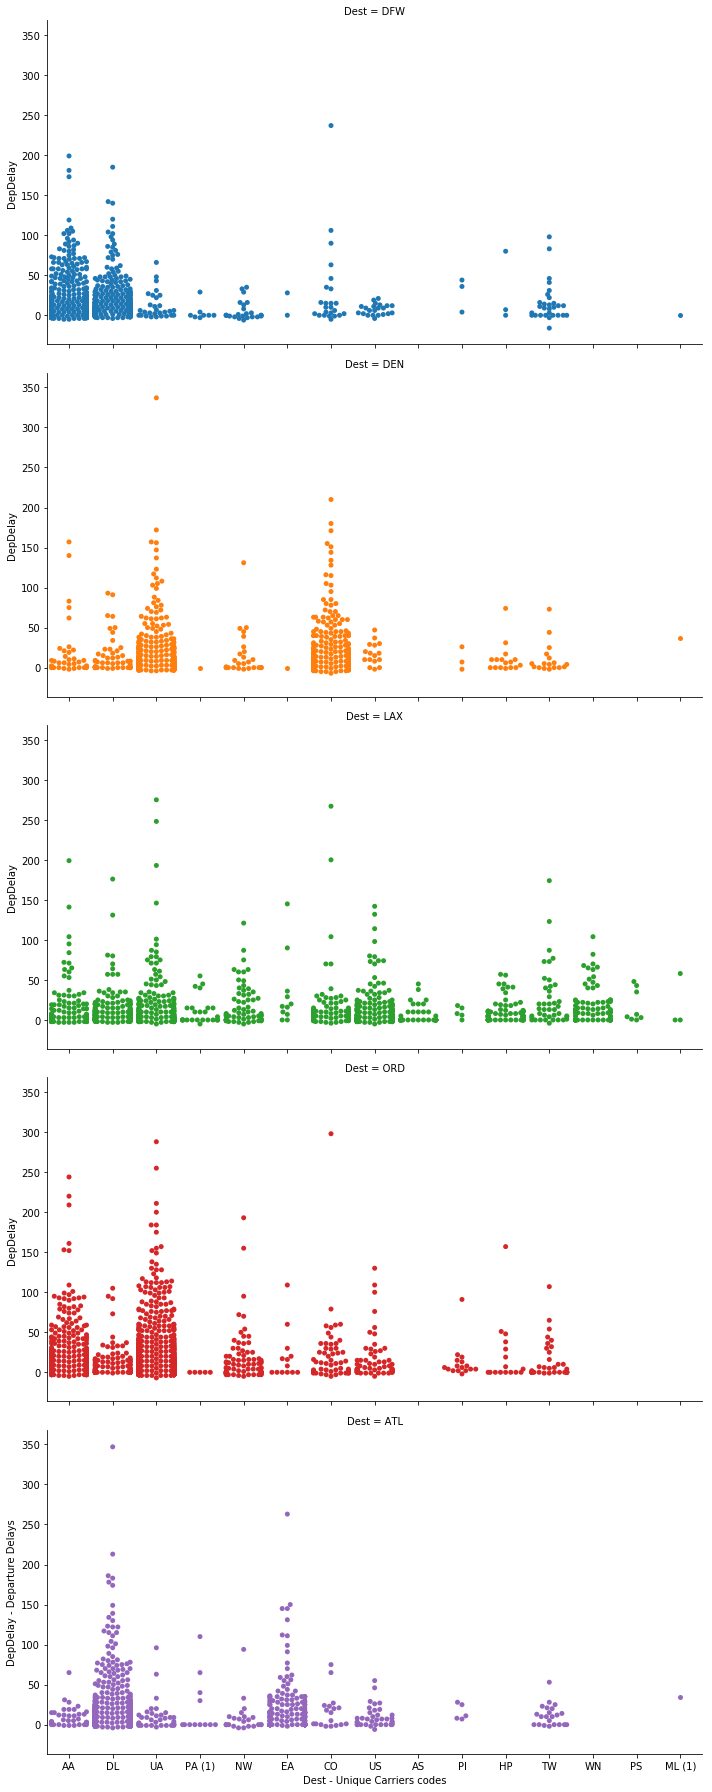

In [33]:
# plot the 3 variables : carrier (UniqueCarrier, departure delay (DeDelay) and destination (Dest)
deplayedplot = sb.catplot(x="UniqueCarrier", y="DepDelay", kind="swarm", data=df_delayed_topcities, hue='Dest', row='Dest', aspect=2)

# set x and y labels
plt.xlabel('Dest - Unique Carriers codes')
plt.ylabel('DepDelay - Departure Delays');